# Sales Forecast
Submitted by : Sreelekshmy S L


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read the train and test data seperately

In [8]:
train = pd.read_csv('/content/drive/MyDrive/TCS iON Internship/demand-forecasting-kernels-only/train.csv')
test = pd.read_csv('/content/drive/MyDrive/TCS iON Internship/demand-forecasting-kernels-only/test.csv')

In [9]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [10]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [11]:
test.tail()

,id,date,store,item
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50
44999,44999,2018-03-31,10,50


Have four columns containing date,store,item and sales values

# EDA

Checking train data and test data shape

In [5]:
print('Train data: ',train.shape)
print('Test data: ',test.shape)

Train data:  (913000, 4)
Test data:  (45000, 4)


In [6]:
# train data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


Date column is object type all others are integer type


In [ ]:
#converting the date column from object type to datetype and storing it seperately
tr_date = pd.DataFrame(pd.to_datetime(train['date']))


In [ ]:
tr_date

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
912995,2017-12-27
912996,2017-12-28
912997,2017-12-29
912998,2017-12-30


Here we can see that the train data has sales data from year 2013 to 2017 and for each day

In [ ]:
train['sales'].describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

Sales is the only continuous column: It has a minimum value of 0 and a maximum of 231 and its mean value is 52.25

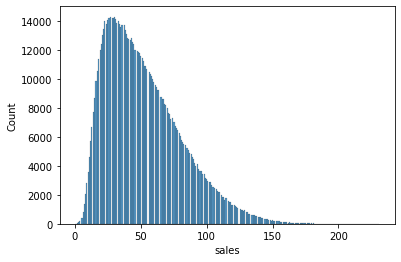

In [ ]:

sns.histplot(train['sales'])

Sales data is right skewed

In [ ]:
#checking how many unique stores and items are present
print('Unique Stores in train data :',train['store'].unique())
print('Unique Items in train data: ',train['item'].unique())

Unique Stores in train data : [ 1  2  3  4  5  6  7  8  9 10]
Unique Items in train data:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [ ]:
print('Unique Stores in test data :',test['store'].unique())
print('Unique Items in test data: ',test['item'].unique())

Unique Stores in test data : [ 1  2  3  4  5  6  7  8  9 10]
Unique Items in test data:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


Both train and test data contains 10 unique stores and 50 unique items.

In [ ]:
#distribution of stores and items
train['store'].value_counts()

1     91300
2     91300
3     91300
4     91300
5     91300
6     91300
7     91300
8     91300
9     91300
10    91300
Name: store, dtype: int64

In [ ]:
train['item'].value_counts()

1     18260
38    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
39    18260
2     18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
27    18260
26    18260
25    18260
24    18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
50    18260
Name: item, dtype: int64

Each store have 91300 rows and each item have 18260 rows assigned to them


# Missing values

In [ ]:
train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
test.isnull().sum()

id       0
date     0
store    0
item     0
dtype: int64

No null values found in both train and test data

# Plotting Sales 

In [ ]:
train.index=pd.to_datetime(train['date'],format='%Y-%m-%d')

In [7]:
train

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [ ]:
sns.set()

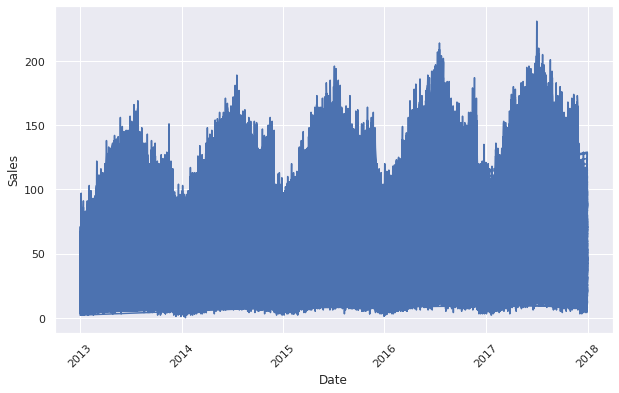

In [ ]:
plt.figure(figsize=(10,6))
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(train.index,train['sales'],)

# Feature engineering

Creating seperate columns for Year, month,day from the date column

In [ ]:
train['date']=pd.to_datetime(train['date'],format='%Y-%m-%d')

In [ ]:
train['Month']=train.date.dt.month
train['Year']=train.date.dt.year
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear
train['DayOfWeek'] = train.index.dayofweek
train['is_month_start'] = train.index.is_month_start
train['is_month_end'] = train.index.is_month_end

train['days_from_epoch'] = (train.index - pd.Timestamp("1970-01-01")).days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


In [ ]:
train

,date,store,item,sales,Month,Year,Day,WeekOfYear,DayOfWeek,is_month_start,is_month_end,days_from_epoch
date,,,,,,,,,,,,
2013-01-01,2013-01-01,1,1,13,1,2013,1,1,1,True,False,15706
2013-01-02,2013-01-02,1,1,11,1,2013,2,1,2,False,False,15707
2013-01-03,2013-01-03,1,1,14,1,2013,3,1,3,False,False,15708
2013-01-04,2013-01-04,1,1,13,1,2013,4,1,4,False,False,15709
2013-01-05,2013-01-05,1,1,10,1,2013,5,1,5,False,False,15710
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,2017-12-27,10,50,63,12,2017,27,52,2,False,False,17527
2017-12-28,2017-12-28,10,50,59,12,2017,28,52,3,False,False,17528
2017-12-29,2017-12-29,10,50,74,12,2017,29,52,4,False,False,17529


Viewing the sum, mean etc of sales after grouping by store, item and month

In [ ]:
train.groupby(["store", "item", "Month"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                             
                    sum       mean median        std
store item Month                                    
1     1    1       2125  13.709677   13.0   4.397413
           2       2063  14.631206   14.0   4.668146
           3       2728  17.600000   17.0   4.545013
           4       3118  20.786667   20.0   4.894301
           5       3448  22.245161   22.0   6.564705
...                 ...        ...    ...        ...
10    50   8      13108  84.567742   85.0  15.676527
           9      11831  78.873333   79.0  15.207423
           10     11322  73.045161   72.0  14.209171
           11     11549  76.993333   77.0  16.253651
           12      8724  56.283871   56.0  11.782529

[6000 rows x 4 columns]

## Validation data
Splitting the train data into training and validation set. For this we take data until 2016 as train set and four months of 2017 as validation set.

In [ ]:
#train-validation split
train_df = train.loc[(train["date"] < "2017-01-01"), :]

# Validation set including first 3 months of 2017 (as we will forecast the first 3 months of 2018)
val = train.loc[(train["date"] >= "2017-01-01") & (train["date"] < "2017-04-01"), :]

In [ ]:
train_df.drop('date',axis=1,inplace=True)
val.drop('date',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


One hot encoding the store and item column

In [ ]:
train_df = pd.get_dummies(train_df, columns=['store', 'item'])
val = pd.get_dummies(val, columns=['store', 'item'])

Converting sales to log(1+sales)

In [ ]:
train_df['sales'] = np.log1p(train_df["sales"].values)
val['sales'] = np.log1p(val["sales"].values)


In [ ]:
#X- y in train valid
train_X = train_df.copy(deep=True)
del train_X['sales']
train_y = train_df['sales']

val_X = val.copy(deep=True)
del val_X['sales']
val_y = val['sales']

# Modeling

## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(n_estimators=100, learning_rate=0.25,
        max_depth=1).fit(train_X, train_y)

In [ ]:
pred_y = clf.predict(val_X)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print('MSE: ',mean_squared_error(val_y,pred_y))
print('R sqaure ',r2_score(val_y,pred_y))

MSE:  0.0980414902195943
R sqaure  0.6767127014722807


## XGBOOST

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(train_X, train_y)
pred_xgb = xgb.predict(val_X)
print('MSE: ',mean_squared_error(val_y,pred_xgb))
print('R sqaure ',r2_score(val_y,pred_xgb))

[13:15:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE:  0.08531395976438066
R sqaure  0.7186811469597907


In [ ]:
pred_y

array([3.36595815, 3.08933207, 3.17500061, ..., 3.92455749, 3.96702292,
       4.02001251])

In [ ]:
pred_xgb

array([3.2173932, 3.006214 , 3.0557194, ..., 3.9404962, 3.9744158,
       4.0342417], dtype=float32)

## LightGBM

In [ ]:
import lightgbm as lgb
lgb_params = {'metric': {'mae'},
              'num_leaves': 10,
              'learning_rate': 0.02,
              'feature_fraction': 0.8,
              'max_depth': 5,
              'verbose': 0,
              'num_boost_round': 15000,
              'early_stopping_rounds': 200,
              'nthread': -1}

cols = [col for col in train.columns if col not in ['date', 'id', "sales", "year"]]

lgbtrain = lgb.Dataset(data=train_X, label=train_y, feature_name=cols)
lgbval = lgb.Dataset(data=val_X, label=val_y, reference=lgbtrain, feature_name=cols)

In [ ]:
import lightgbm as lgb
model = lgb.LGBMRegressor(random_state = 42)
model.fit(train_X, train_y, eval_set = [(val_X, val_y), (train_X, train_y)])

[1]	training's l2: 0.301356	valid_0's l2: 0.282503
[2]	training's l2: 0.273534	valid_0's l2: 0.264605
[3]	training's l2: 0.252066	valid_0's l2: 0.246375
[4]	training's l2: 0.236848	valid_0's l2: 0.23468
[5]	training's l2: 0.218081	valid_0's l2: 0.211028
[6]	training's l2: 0.202994	valid_0's l2: 0.208166
[7]	training's l2: 0.192971	valid_0's l2: 0.199247
[8]	training's l2: 0.181352	valid_0's l2: 0.182677
[9]	training's l2: 0.172913	valid_0's l2: 0.169412
[10]	training's l2: 0.166154	valid_0's l2: 0.164444
[11]	training's l2: 0.15812	valid_0's l2: 0.156803
[12]	training's l2: 0.147794	valid_0's l2: 0.151129
[13]	training's l2: 0.13802	valid_0's l2: 0.138798
[14]	training's l2: 0.124332	valid_0's l2: 0.124061
[15]	training's l2: 0.119844	valid_0's l2: 0.121155
[16]	training's l2: 0.114329	valid_0's l2: 0.116805
[17]	training's l2: 0.10874	valid_0's l2: 0.112623
[18]	training's l2: 0.0987145	valid_0's l2: 0.100988
[19]	training's l2: 0.0940251	valid_0's l2: 0.100881
[20]	training's l2: 0.0

LGBMRegressor(random_state=42)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(train_X,train_y)))
print('Testing accuracy {:.4f}'.format(model.score(val_X,val_y)))

Training accuracy 0.9144
Testing accuracy 0.8926


Comparing all the three models used LightGBM is found to be the best fit for the data

# Feature engineering on test data

In [ ]:

test.index=pd.to_datetime(test['date'],format='%Y-%m-%d')
test['date']=pd.to_datetime(test['date'],format='%Y-%m-%d')

test['Month']=test.date.dt.month
test['Year']=test.date.dt.year
test['Day'] = test.index.day
test['WeekOfYear'] = test.index.weekofyear
test['DayOfWeek'] = test.index.dayofweek
test['is_month_start'] = test.index.is_month_start
test['is_month_end'] = test.index.is_month_end
test['days_from_epoch'] = (test.index - pd.Timestamp("1970-01-01")).days


test.drop('date',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [ ]:

test_X = test.copy(deep=True)
del test_X['id']
test_X=pd.get_dummies(test_X, columns=['store', 'item'])


In [ ]:
model.predict(test_X)

array([2.65126074, 2.75405556, 2.75405556, ..., 4.34474538, 4.42260569,
       4.45391709])

# END